**Implement KNN classier and experiment with the following concepts**

    Check the performance of KNN with different distance measures
    Check the performance of KNN with binary, categorical & numerical data

KNN is an algorithm that is useful for matching a point with its closest k neighbors in a multi-dimensional space. It can be used for data that are continuous, discrete, ordinal and categorical

**Numerical**

1. <font color='green'> Euclidean distance </font> Euclidean Distance represents the shortest distance between two points. It is used to calculate the distance between two rows of data that have numerical values, such a floating point or integer values.

2. <font color='green'> Manhattan distance: </font> Manhattan Distance is the sum of absolute differences between points across all the dimensions. It is a good measure to use if the input variables are not similar in type such as age, height, etc.

**Binary**

1. <font color='green'> Euclidean distance: </font> Euclidean Distance represents the shortest distance between two points. It is used to calculate the distance between two rows of data that have numerical values, such a floating point or integer values.

2. <font color='green'>Jaccard distance: </font>

**Categorical**

1. <font color='green'> Hamming distance: </font> Hamming Distance measures the similarity between two strings of the same length. The Hamming Distance between two strings of the same length is the number of positions at which the corresponding characters are different. It take all the categorical attributes and for each, count one if the value is not the same between two points. The Hamming distance is then the number of attributes for which the value was different.
    
2. <font color='green'> Jaccard distance </font> Jaccard distance can be used to measure when categorical variables are present in the data.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical Data

In [2]:
#Reading the dataset (Gold dataset)
gold_dataset = pd.read_csv("gold_rate_history.csv", index_col='Date', header='infer', parse_dates=True, infer_datetime_format=True)

In [3]:
gold_dataset.head()

,Country,State,Location,Pure Gold (24 k),Standard Gold (22 K)
Date,,,,,
2006-01-02,India,Tamilnadu,Chennai,768.0,711.0
2006-01-03,India,Tamilnadu,Chennai,770.5,713.0
2006-01-04,India,Tamilnadu,Chennai,784.5,726.0
2006-01-05,India,Tamilnadu,Chennai,782.5,725.0
2006-01-06,India,Tamilnadu,Chennai,776.0,719.0


# Data Pre-Processing

**1. Checking for missing values**

In [4]:
gold_dataset.isna().sum()

Country                 0
State                   0
Location                0
Pure Gold (24 k)        0
Standard Gold (22 K)    0
dtype: int64

**2. Dropping the unnecessary columns**

In [5]:
# Dropping Unwanted Columns
unwanted_cols = ['Country','State','Location']
gold_dataset.drop(unwanted_cols, axis=1, inplace=True)
gold_dataset.head()

,Pure Gold (24 k),Standard Gold (22 K)
Date,,
2006-01-02,768.0,711.0
2006-01-03,770.5,713.0
2006-01-04,784.5,726.0
2006-01-05,782.5,725.0
2006-01-06,776.0,719.0


**3. Renaming the columns**

In [6]:
# Renaming Columns
gold_dataset.rename(columns={"Pure Gold (24 k)": "Pure_Gold_24k", "Standard Gold (22 K)": "Std_Gold_22k",},inplace=True)
gold_dataset.head()

,Pure_Gold_24k,Std_Gold_22k
Date,,
2006-01-02,768.0,711.0
2006-01-03,770.5,713.0
2006-01-04,784.5,726.0
2006-01-05,782.5,725.0
2006-01-06,776.0,719.0


**4. Data Scaling**

In [7]:
#For Nnormalizing real-valued input and output variables
from sklearn.preprocessing import MinMaxScaler
cols = gold_dataset.columns
idx = gold_dataset.index
scaler = MinMaxScaler(feature_range=(0,1))

df_scaled = pd.DataFrame(scaler.fit_transform(gold_dataset), columns=cols, index=idx)

**5. Feature Extraction**

In [8]:
df_svr = df_scaled.copy()

# Converting Date Index to Column for Feature Extraction
df_svr.reset_index(level=0, inplace=True)

# Time Feature Extraction
df_svr['year']=df_svr['Date'].dt.year 
df_svr['month']=df_svr['Date'].dt.month 
df_svr['day']=df_svr['Date'].dt.day
df_svr['quarter']=df_svr['Date'].dt.quarter
df_svr['weekofyear']=df_svr['Date'].dt.weekofyear
df_svr['weekday']=df_svr['Date'].dt.weekday

# Dropping Date Column
df_svr.drop('Date',axis=1,inplace=True)

df_svr

,Pure_Gold_24k,Std_Gold_22k,year,month,day,quarter,weekofyear,weekday
0,0.000000,0.000000,2006,1,2,1,1,0
1,0.000508,0.000425,2006,1,3,1,1,1
2,0.003354,0.003188,2006,1,4,1,1,2
3,0.002948,0.002976,2006,1,5,1,1,3
4,0.001626,0.001700,2006,1,6,1,1,4
...,...,...,...,...,...,...,...,...
4966,0.881277,0.881828,2020,10,6,4,41,1
4967,0.869689,0.870351,2020,10,7,4,41,2
4968,0.870705,0.871201,2020,10,8,4,41,3
4969,0.879244,0.879702,2020,10,9,4,41,4


# Model Building and Model Evaluation

In [9]:
# Feature Engineering
features = ['year','month','day','quarter','weekofyear','weekday']
target = ['Pure_Gold_24k']
X = df_svr[features]
y = df_svr[target]

#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Euclidean distance**

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn1 = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
knn1.fit(X_train, y_train.values.ravel())
y_pred1 = knn1.predict(X_test)

In [16]:
from sklearn import metrics as mt
rmse = mt.mean_squared_error(y_test,y_pred1)
r2_score = mt.r2_score(y_test,y_pred1)
print("Root Mean Square Error: ", rmse)
print("R Squared value: ", r2_score)

Root Mean Square Error:  0.003168466413739735
R Squared value:  0.9222175432735079


**Conclusion:** The root mean square error is 0.003 which indicated as better fit and the R squared value is 0.9222 which indicates that 92.22% of the data fits the model.

**Manhattan distance**

In [17]:
knn2 = KNeighborsRegressor(n_neighbors=3, metric='manhattan')
knn2.fit(X_train, y_train.values.ravel())        
y_pred2 = knn2.predict(X_test)

In [18]:
rmse = mt.mean_squared_error(y_test,y_pred2)
r2_score = mt.r2_score(y_test,y_pred2)
print("Root Mean Square Error: ", rmse)
print("R Squared value: ", r2_score)

Root Mean Square Error:  0.0032969305166786157
R Squared value:  0.9190638871437093


**Conclusion:** The root mean square error is 0.003 which indicated as better fit and the R squared value is 0.9190 which indicates that 91.90% of the data fits the model.

**Conclusion for numerical data**

KNN with Euclidean distance measure gives the accuracy of 92.22% and KNN with Manhattan distance measure gives the accuracy of 91.90%. Therefore Euclidean distance measure gives a better accuracy. Hence it is a better KNN model as compared to KNN with Manhattan distance measure

# Binary Data

In [20]:
#Reading the dataset (Loan dataset)
loan_dataset = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [21]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Pre-Processing

**1. Checking for missing values**

In [22]:
loan_dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**2. Filling missing values**

In [23]:
loan_dataset['Gender'] = loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode().values[0])
loan_dataset['Married'] = loan_dataset['Married'].fillna(loan_dataset['Married'].mode().values[0])
loan_dataset['Dependents'] = loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode().values[0])
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode().values[0])
loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean())
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mode().values[0] )
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode().values[0] )

**3. Removing the Id column**

In [24]:
loan_dataset.drop('Loan_ID', axis=1, inplace=True)
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


**4. Feature Extraction**

In [25]:
#Convert some object data type to int
gender = {"Female": 0, "Male": 1}
yes_no = {'No' : 0,'Yes' : 1}
dependents = {'0':0,'1':1,'2':2,'3+':3}
education = {'Not Graduate' : 0, 'Graduate' : 1}
property = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
output = {"N": 0, "Y": 1}

loan_dataset['Gender'] = loan_dataset['Gender'].replace(gender)
loan_dataset['Married'] = loan_dataset['Married'].replace(yes_no)
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace(dependents)
loan_dataset['Education'] = loan_dataset['Education'].replace(education)
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].replace(yes_no)
loan_dataset['Property_Area'] = loan_dataset['Property_Area'].replace(property)
loan_dataset['Loan_Status'] = loan_dataset['Loan_Status'].replace(output)

loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


# Model Building and Model Evaluation

In [26]:
# Drop "Loan_Status" and assign it to target variable.
X = loan_dataset.drop('Loan_Status', 1)
y = loan_dataset.Loan_Status

#Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Euclidean distance**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn3.fit(X_train, y_train)
y_pred3 = knn3.predict(X_test)

In [29]:
#Actual value and the predicted value
diff_knn3 = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred3})
diff_knn3.head()

,Actual value,Predicted value
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1


              precision    recall  f1-score   support

           0       0.22      0.19      0.20        43
           1       0.70      0.74      0.72       111

    accuracy                           0.58       154
   macro avg       0.46      0.46      0.46       154
weighted avg       0.57      0.58      0.57       154



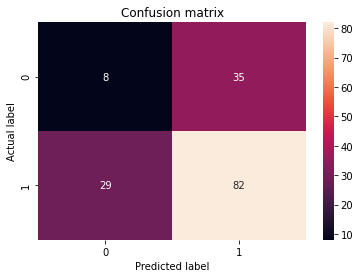

In [27]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred3)
p = sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred3))

**Conclusion:** 154 (25%) of the records were given for testing out of which 61 records were misclassified

**Jaccard distance**

In [30]:
knn4 = KNeighborsClassifier(n_neighbors=3, metric='jaccard')
knn4.fit(X_train, y_train)
y_pred4 = knn4.predict(X_test)

In [31]:
#Actual value and the predicted value
diff_knn4 = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred4})
diff_knn4.head()

,Actual value,Predicted value
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1


              precision    recall  f1-score   support

           0       0.70      0.49      0.58        43
           1       0.82      0.92      0.87       111

    accuracy                           0.80       154
   macro avg       0.76      0.70      0.72       154
weighted avg       0.79      0.80      0.79       154



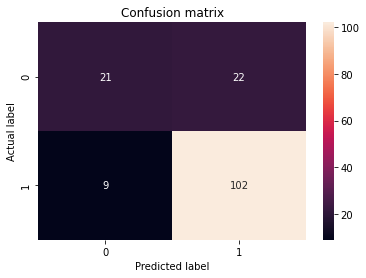

In [32]:
#Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred4)
p = sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred4))

**Conclusion:** 154 (25%) of the records were given for testing out of which 31 records were misclassified

**Conclusion for binary data**

KNN with Euclidean distance measure gives the accuracy of 58% and KNN with Jaccard distance measure gives the accuracy of 80%. Therefore Jaccard distance measure gives a better accuracy. Hence it is a better KNN model as compared to KNN with Euclidean distance measure

# Categorical Data

In [33]:
#Reading the dataset (Black friday sale)
sales_dataset = pd.read_csv("black_friday_sale.csv", nrows = 20000)

In [34]:
sales_dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Pre-Processing

**1. Checking for missing values**

In [35]:
sales_dataset.isna().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2             6397
Product_Category_3            13994
Purchase                          0
dtype: int64

**2. Feature selection**

In [36]:
sales_dataset = sales_dataset[['Occupation','Gender', 'Purchase']]

# Model Building and Model Evaluation

In [49]:
x = sales_dataset.loc[:,sales_dataset.columns != 'Gender'] 
y = sales_dataset.loc[:,'Gender']

#Splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

**Hamming distance**

In [50]:
knn5 = KNeighborsClassifier(n_neighbors = 3, metric='hamming')
knn5.fit(x_train,y_train)
y_pred5 = knn5.predict(x_test)

In [51]:
#Actual value and the predicted value
diff_knn5 = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred5})
diff_knn5.head()

,Actual value,Predicted value
10650,M,M
2041,M,M
8668,F,M
1114,F,M
13902,F,M


[[ 158  778]
 [ 170 2894]]
              precision    recall  f1-score   support

           F       0.48      0.17      0.25       936
           M       0.79      0.94      0.86      3064

    accuracy                           0.76      4000
   macro avg       0.63      0.56      0.55      4000
weighted avg       0.72      0.76      0.72      4000



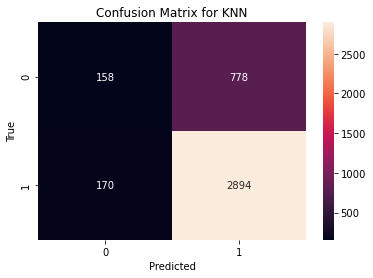

In [52]:
#Confusion matrix and classification report
con_mat = confusion_matrix(y_test, y_pred5)
print(con_mat)

sns.heatmap(con_mat, annot=True, fmt="d")
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test, y_pred5))

**Conclusion:** 4000 (20%) of the records were given for testing out of which 948 records were misclassified

**Jaccard distance**

In [54]:
knn6 = KNeighborsClassifier(n_neighbors=3, metric='jaccard')
knn6.fit(x_train, y_train)
y_pred6 = knn6.predict(x_test)

In [55]:
#Actual value and the predicted value
diff_knn6 = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred6})
diff_knn6.head()

,Actual value,Predicted value
10650,M,M
2041,M,M
8668,F,M
1114,F,M
13902,F,M


[[   0  936]
 [   0 3064]]
              precision    recall  f1-score   support

           F       0.00      0.00      0.00       936
           M       0.77      1.00      0.87      3064

    accuracy                           0.77      4000
   macro avg       0.38      0.50      0.43      4000
weighted avg       0.59      0.77      0.66      4000



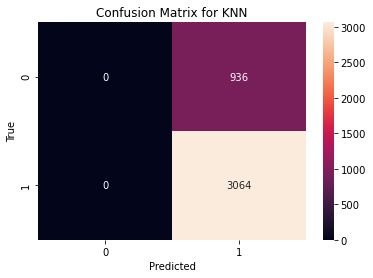

In [57]:
#Confusion matrix and classification report
con_mat = confusion_matrix(y_test, y_pred6)
print(con_mat)

sns.heatmap(con_mat, annot=True, fmt="d")
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test, y_pred6))

**Conclusion:** 4000 (20%) of the records were given for testing out of which 936 records were misclassified

**Conclusion for categorical data**

KNN with Hamming distance measure gives the accuracy of 76% and KNN with Jaccard distance measure gives the accuracy of 77%. Therefore Jaccard distance measure gives a better accuracy. Hence it is a better KNN model as compared to KNN with Hamming distance measure